In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


2024-07-01 23:44:47.719148: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-01 23:44:47.822224: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-01 23:44:48.199322: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-01 23:44:49.585035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
# Define the paths to the dataset folders
stop_sign_path = 'datasets/stop'
not_stop_sign_path = 'datasets/not_stop'

# Initialize lists to hold image data and labels
images = []
labels = []

# Function to load images from a given folder
def load_images_from_folder(folder, label):
    for file in os.listdir(folder):
        if file.endswith('.png') or file.endswith('.jpg'):
            # Read the image
            image_path = os.path.join(folder, file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (64, 64)) # Resize to a standard size
            
            # Append image and label to lists
            images.append(image)
            labels.append(label)

# Load images for stop signs
load_images_from_folder(stop_sign_path, label=1)

# Load images for non-stop signs
load_images_from_folder(not_stop_sign_path, label=0)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize image data
images = images / 255.0

print(f"Loaded {len(images)} images with labels.")


Loaded 170 images with labels.


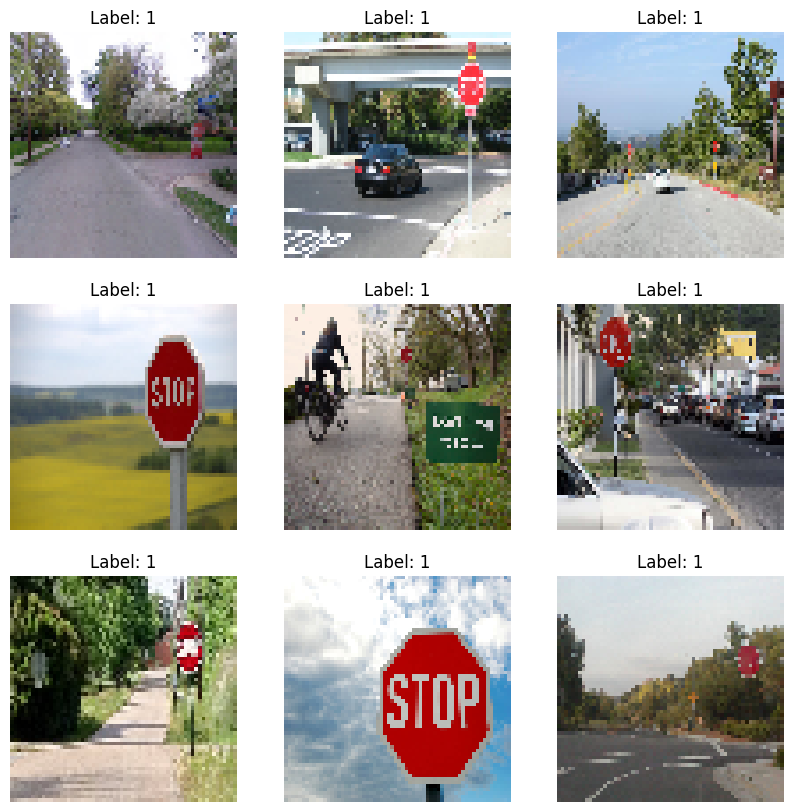

In [7]:
# Check a few images and labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

In [8]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")


Training set: (136, 64, 64, 3), Validation set: (34, 64, 64, 3)


In [10]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/home/mindfreek/anaconda3/envs/AIZone/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-01 23:48:57.001333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-01 23:48:57.001793: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5305 - loss: 1.0291 - val_accuracy: 0.5588 - val_loss: 0.6711
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.4417 - loss: 0.7204 - val_accuracy: 0.4412 - val_loss: 0.7231
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6329 - loss: 0.6482 - val_accuracy: 0.8824 - val_loss: 0.6171
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7824 - loss: 0.5803 - val_accuracy: 0.8235 - val_loss: 0.5729
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7915 - loss: 0.5395 - val_accuracy: 0.6765 - val_loss: 0.6073
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8147 - loss: 0.4498 - val_accuracy: 0.6765 - val_loss: 0.5633
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8415 - loss: 0.4112 - val_accuracy: 0.6765 - val_loss: 0.6789
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8137 - loss: 0.3868 - val_accuracy: 0.8529 - val_loss: 0.478

In [11]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=['Non-Stop Sign', 'Stop Sign']))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7598 - loss: 0.5465 
Validation Accuracy: 76.47%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
               precision    recall  f1-score   support

Non-Stop Sign       0.67      0.93      0.78        15
    Stop Sign       0.92      0.63      0.75        19

     accuracy                           0.76        34
    macro avg       0.79      0.78      0.76        34
 weighted avg       0.81      0.76      0.76        34

